## Titanic Survival

Given the survival dataset of Titanic passengers, can you predict who could have been survived?

#### Data Dictionary
Fileds:  
PassengerId  
survival:   Survival,0 = No, 1 = Yes  
pclass:  	Ticket class, 	1 = 1st, 2 = 2nd, 3 = 3rd  
Name  
sex:         Sex 	
Age: 	    Age in years 	
sibsp: 	    # of siblings / spouses aboard the Titanic 	
parch: 	    # of parents / children aboard the Titanic 	
ticket: 	    Ticket number 	
fare: 	    Passenger fare 	
cabin: 	    Cabin number 	
embarked: 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
print(df.shape)
print(df.info())
df.head()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analyze and Clean Data
* Name and Ticket number are not useful.  
* Sex, Cabin and Embarked fileds are not numberic. They need to be changed to numeric.
* Cabin has missing data.

In [2]:
df = df.set_index('PassengerId')
df = df.drop(['Name','Ticket'],axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


In [3]:
# Make sure all rows have a class.
# This shows that the classes are imbalanced
from collections import Counter
c = Counter(df['Survived'])
print(c)

Counter({0: 549, 1: 342})


In [4]:
# Let's see how much missing data we have

total = df.isnull().sum().sort_values(ascending=False)

percent_1 = df.isnull().sum()/df.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(10)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0


In [5]:
# Cabin has too much missing. Let's drop it.
df = df.drop(['Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [6]:
import numpy as np

np.random.seed(42)

age_mean = df["Age"].mean()
age_std = df["Age"].std()
is_null = df["Age"].isnull().sum()

# create a list of random numbers between the mean, std and is_null
rand_age = np.random.randint(age_mean - age_std, age_mean + age_std, size = is_null)

# fill null values in Age column with random values generated
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice

print('number of null age values:',df["Age"].isnull().sum())

number of null age values: 0


In [7]:
# let's see the values that we have in Sex, Cabin and Embarked.
from collections import Counter
sex_count = Counter(df['Sex'])
Embarked_count = Counter(df['Embarked'])
print('sex_count:',sex_count)
print('-----------------')
print('-----------------')
print('Embarked_count:',Embarked_count)

sex_count: Counter({'male': 577, 'female': 314})
-----------------
-----------------
Embarked_count: Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})


In [8]:
# Let's replace values with their indecies in the counters
# nans are also replaced by the relative index
# We can drop the original fields.

df['sex_numeric'] = df['Sex'].apply(lambda x: list(sex_count.keys()).index(x))

df['Embarked_numeric'] = df['Embarked'].apply(
    lambda x: list(Embarked_count.keys()).index(x))

df = df.drop(['Sex','Embarked'],axis = 1)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_numeric,Embarked_numeric
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0
2,1,1,38.0,1,0,71.2833,1,1
3,1,3,26.0,0,0,7.9250,1,0
4,1,1,35.0,1,0,53.1000,1,0
5,0,3,35.0,0,0,8.0500,0,0


## Machine Learning Starts Here!
Now that the data is cleaned, we are ready to do machine learning.

In [9]:
# First, we seperate input and output data.
df_y = pd.DataFrame(df['Survived'])
df_x = df[['Pclass','Age','SibSp','Parch','Fare','sex_numeric',
           'Embarked_numeric']]

In [10]:
# Keep some data for out of sample testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_x,df_y, test_size=0.2,random_state=42)

In [11]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,sex_numeric,Embarked_numeric
PassengerId,,,,,,,
332,1,45.5,0,0,28.5000,0,0
734,2,23.0,0,0,13.0000,0,0
383,3,32.0,0,0,7.9250,0,0
705,3,26.0,1,0,7.8542,0,0
814,3,6.0,4,2,31.2750,1,0


In [12]:
y_train.head()

,Survived
PassengerId,
332,0
734,0
383,0
705,0
814,0


In [13]:
# Let's train our decision tree
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=100256)

clf = clf.fit(X_train,y_train)

[Text(167.70341249999998, 212.91, 'X[5] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(58.862024999999996, 203.85, 'X[1] <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(11.383199999999999, 194.79, 'X[2] <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(8.704799999999999, 185.73, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(14.061599999999999, 185.73, 'X[3] <= 1.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(11.383199999999999, 176.67, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(16.74, 176.67, 'X[2] <= 4.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(14.061599999999999, 167.60999999999999, 'X[1] <= 3.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(11.383199999999999, 158.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(16.74, 158.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(19.4184, 167.60999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(106.34084999999999, 194.79, 'X[0] <= 1.5\ngini 

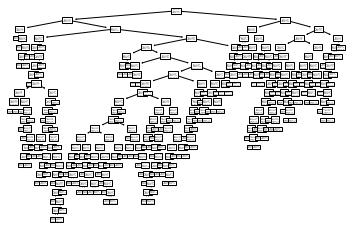

In [14]:
tree.plot_tree(clf)

In [15]:
# Now evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix

y_train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train,y_train_pred)
print('Train Accuracy:',round(train_acc * 100,2))

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print('Accuracy:',round(acc*100,2))
print('Confusion Matrix:')
print(cm)

Train Accuracy: 98.46
Accuracy: 74.86
Confusion Matrix:
[[84 21]
 [24 50]]


In [16]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,sex_numeric,Embarked_numeric
PassengerId,,,,,,,
332,1,45.5,0,0,28.5000,0,0
734,2,23.0,0,0,13.0000,0,0
383,3,32.0,0,0,7.9250,0,0
705,3,26.0,1,0,7.8542,0,0
814,3,6.0,4,2,31.2750,1,0


In [17]:
y_train.head()

,Survived
PassengerId,
332,0
734,0
383,0
705,0
814,0


In [18]:
from sklearn.model_selection import GridSearchCV

# This is not good. Let's see if it can be improved using cross validation.
param_dict = {'criterion':['gini','entropy'],
              'max_depth':range(1,10), # How deep the tree can go
              'min_samples_split':range(1,10), # min number of samples needed to split
              'min_samples_leaf':range(1,5)} # min number of samples should reach a leaf

# What is the mode to do cross validation
clf_CV = tree.DecisionTreeClassifier(random_state=42)
# create the grid search
grid = GridSearchCV(clf_CV,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
# search the grid
grid.fit(X_train,y_train)

# Get the best model that we could find
best_clf = grid.best_estimator_

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/Users/raha/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.7879108  0.7879108  0.7879108  0.7879108  0.7879108
 0.7879108  0.7879108  0.7879108         nan 0.7879108  0.7879108
 0.7879108  0.7879108  0.7879108  0.7879108  0.7879108  0.7879108
        nan 0.7879108  0.7879108  0.7879108  0.7879108  0.7879108
 0.7879108  0.7879108  0.7879108         nan 0.7879108  0.7879108
 0.7879108  0.7879108  0.7879108  0.7879108  0.7879108  0.7879108
        nan 0.77668232 0.77668232 0.77668232 0.77668232 0.77668232
 0.77668232 0.77668232 0.77668232        nan 0.77668232 0.77668232
 0.77668232 0.77668232 0.77668232 0.77668232 0.77668232 0.77668232
        nan 0.77668232 0.77668232 0.77668232 0.77668232 0.77668232
 0.77668232 0.77668232 0.77668232        nan 0.77668232 0.77668232
 0.77668232 0.77668232 0.77668232 0.77668232 0.77668232 0.77668232
        nan 0.82304382 0.82304382 0.82304382 0.8

In [19]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [20]:
# Let's reevaluate

y_train_pred = best_clf.predict(X_train)
train_acc = accuracy_score(y_train,y_train_pred)
print('Train Accuracy:',round(train_acc * 100,2))

y_pred = best_clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print('Accuracy:',round(acc*100,2))
print('Confusion Matrix:')
print(cm)

Train Accuracy: 83.43
Accuracy: 79.89
Confusion Matrix:
[[92 13]
 [23 51]]


In [21]:
# For reference
c_test = Counter(y_test['Survived'])
print(c_test)

Counter({0: 105, 1: 74})


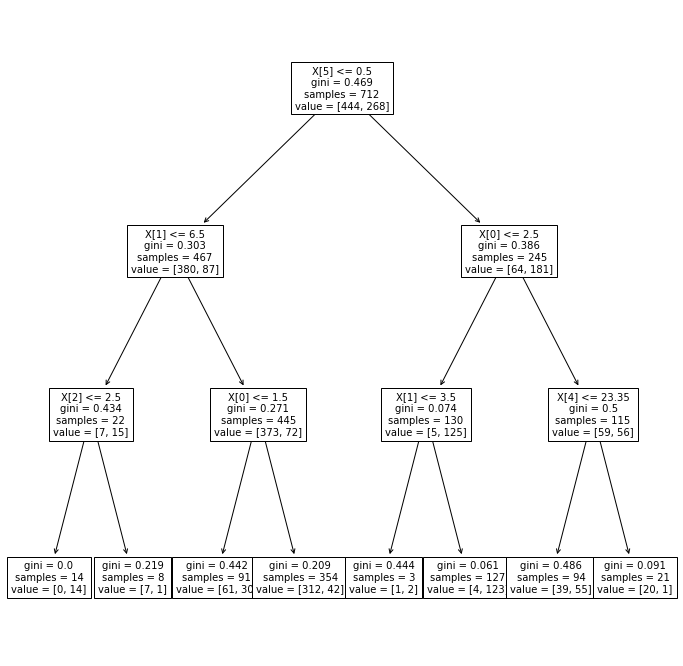

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(best_clf, fontsize=10)
plt.show()

### Ensemble Models on Titanic
Let's see how random forest and GBM perform on the data that we created.

In [23]:
# First let's try random forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators, # How many trees should trian
               'max_features': max_features, # How many feature consider for splits
               'max_depth': max_depth,       # How deep should each tree go
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}       # should use boostrap samples or not


rf = RandomForestClassifier(random_state = 42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/raha/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [24]:
# Let's reevaluate
y_train_pred = rf_random.best_estimator_.predict(X_train)
train_acc = accuracy_score(y_train,y_train_pred)
print('Train Accuracy:',round(train_acc * 100,2))

y_pred = rf_random.best_estimator_.predict(X_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print('Accuracy:',round(acc*100,2))
print('Confusion Matrix:')
print(cm)

Train Accuracy: 90.73
Accuracy: 81.01
Confusion Matrix:
[[93 12]
 [22 52]]


In [25]:
# Now is time for GBM
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=42)
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

cv_gbm = RandomizedSearchCV(gbm,param_distributions=parameters,
                            n_iter = 100,random_state=42,cv=3,verbose=2,n_jobs=-1)
cv_gbm.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/raha/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [26]:
# Let's reevaluate

y_train_pred = cv_gbm.best_estimator_.predict(X_train)
train_acc = accuracy_score(y_train,y_train_pred)
print('Train Accuracy:',round(train_acc * 100,2))

y_pred = cv_gbm.best_estimator_.predict(X_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print('Accuracy:',round(acc*100,2))
print('Confusion Matrix:')
print(cm)

Train Accuracy: 98.46
Accuracy: 79.33
Confusion Matrix:
[[92 13]
 [24 50]]
